In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import nltk
from nltk import tokenize
import seaborn as sns



In [22]:
df = pd.read_csv('./Data/imdb-reviews-pt-br.csv')
df

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg
...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos


In [3]:
df['sentiment'].value_counts()

sentiment
neg    24765
pos    24694
Name: count, dtype: int64

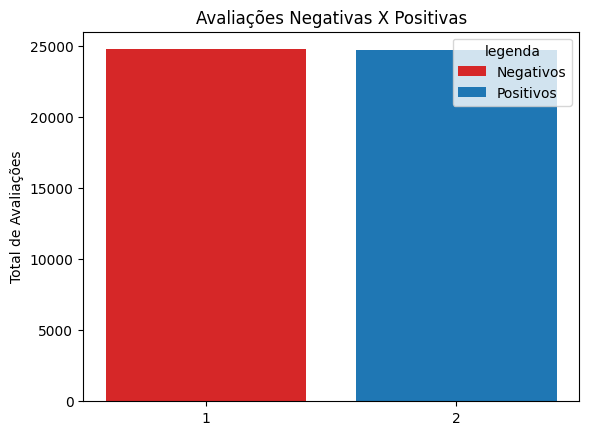

<Figure size 640x480 with 0 Axes>

In [4]:
fig, ax = plt.subplots()

x = [1, 2]
y = [df[df['sentiment'] == 'neg']['sentiment'].count(), df[df['sentiment'] == 'pos']['sentiment'].count()]
bar_labels = ['Negativos', 'Positivos']
bar_colors = ['tab:red', 'tab:blue']
plt.xticks([1, 2])

ax.bar(x, y, label=bar_labels, color=bar_colors)
plt.figure(figsize=(8, 6), dpi=80)


ax.set_ylabel('Total de Avaliações')
ax.set_title('Avaliações Negativas X Positivas')
ax.legend(title='legenda')

plt.show()

In [24]:
classification = df['sentiment'].replace(['neg', 'pos'], [0, 1])
classification

C:\Users\lucas\AppData\Local\Temp\ipykernel_5272\442015817.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  classification = df['sentiment'].replace(['neg', 'pos'], [0, 1])


0        0
1        0
2        0
3        0
4        0
        ..
49454    1
49455    1
49456    1
49457    1
49458    1
Name: sentiment, Length: 49459, dtype: int64

In [25]:
df['classification'] = classification
df.head()

,id,text_en,text_pt,sentiment,classification
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


In [7]:
df.tail()

,id,text_en,text_pt,sentiment,classification
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1
49458,49460,Working-class romantic drama from director Mar...,O drama romântico da classe trabalhadora do di...,pos,1


In [26]:
vetorizar = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vetorizar.fit_transform(df["text_pt"])
treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                              df['classification'],
                                                              random_state = 42)

In [27]:
def classificar_texto(texto, coluna_texto, coluna_classificacao):
    vetorizar = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])
    treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                              texto[coluna_classificacao],
                                                              random_state = 42)
    regressao_logistica = LogisticRegression()
    regressao_logistica.fit(treino, classe_treino)
    return regressao_logistica.score(teste, classe_teste)
print(classificar_texto(df, "text_pt", "classification"))

0.6583097452486858


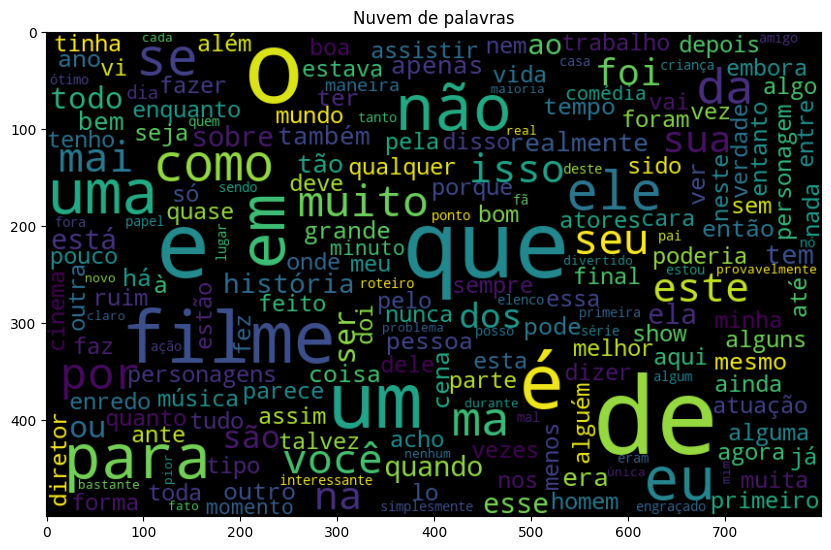

In [10]:
def create_word_cloud(df, coluna):

    text_all = ' '.join([text for text in df[coluna]])
    word_cloud_creator = WordCloud(width = 800, height = 500, max_font_size = 110, collocations = False)
    word_cloud = word_cloud_creator.generate(text_all)
    
    plt.figure(figsize = (10, 8))
    plt.imshow(word_cloud, interpolation = 'bilinear')
    plt.title('Nuvem de palavras')
    plt.show()


def create_word_cloud_neg(texto, coluna_texto):
    texto_negativo = texto.query("sentiment == 'neg'")
    todas_palavras = ' '.join([texto for texto in texto_negativo[coluna_texto]])

    nuvem_palavras = WordCloud(width= 800, height= 500,
                              max_font_size = 110,
                              collocations = False).generate(todas_palavras)
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis("off")
    plt.show()

def create_word_cloud_pos(texto, coluna_texto):
    texto_positivo = texto.query("sentiment == 'pos'")
    todas_palavras = ' '.join([texto for texto in texto_positivo[coluna_texto]])

    nuvem_palavras = WordCloud(width= 800, height= 500,
                              max_font_size = 110,
                              collocations = False).generate(todas_palavras)
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis("off")
    plt.show()

create_word_cloud(df = df, coluna = 'text_pt') 
  

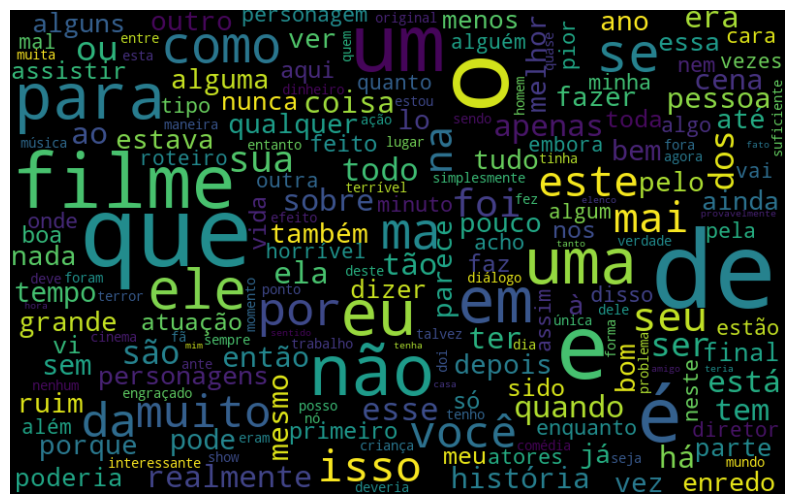

In [11]:
create_word_cloud_neg(df, 'text_pt')



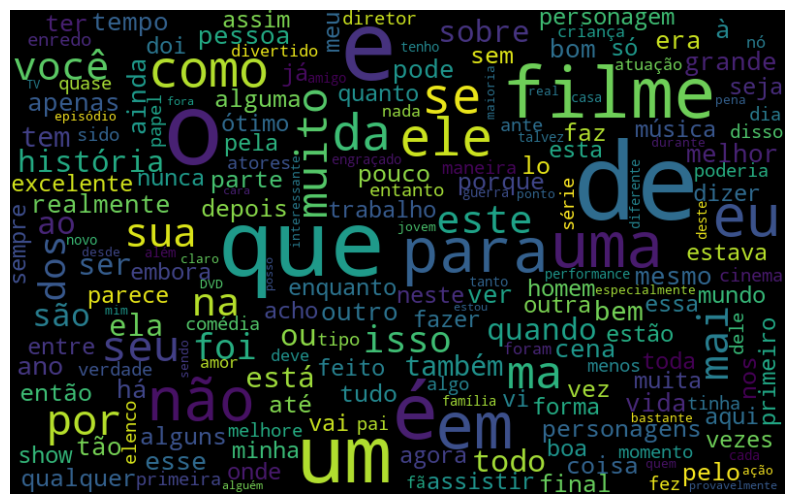

In [12]:
create_word_cloud_pos(df, 'text_pt')


In [28]:
def tokenizacao(text):
    token = tokenize.WhitespaceTokenizer()
    tokenizacao = token.tokenize(text)
    frequencia = nltk.FreqDist(tokenizacao)
   
    return frequencia

In [29]:
text = ' '.join([text for text in df['text_pt']])
frequencia = tokenizacao(text)


In [30]:
df_frequencia = pd.DataFrame({'Palavra':list(frequencia.keys()), 'Frequencia':frequencia.values()})
df_frequencia.head()

,Palavra,Frequencia
0,Mais,1538
1,uma,130888
2,"vez,",1927
3,o,244881
4,Sr.,1741


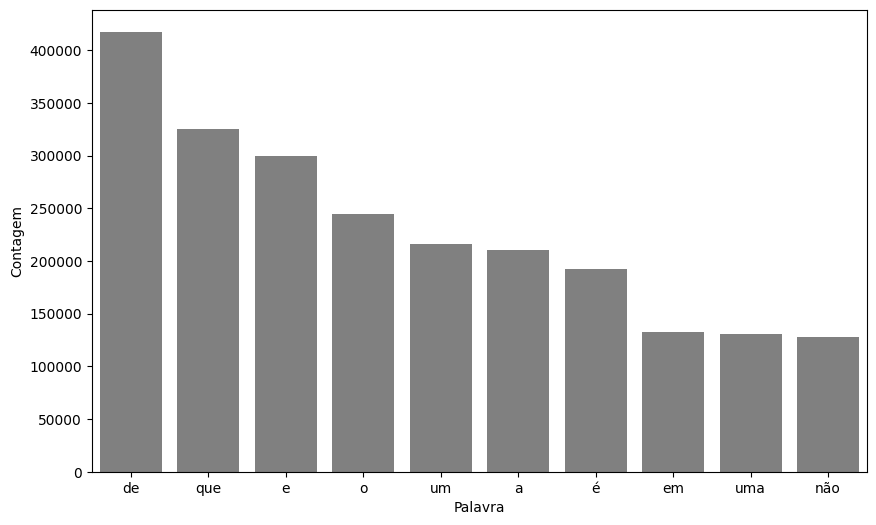

In [16]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data = df_frequencia.nlargest(columns= "Frequencia", n = 10), x = "Palavra", y = "Frequencia", color = 'gray')
ax.set(ylabel = "Contagem")
plt.show()

In [31]:
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")

frase_processada = list()
token = tokenize.WhitespaceTokenizer()
for opiniao in df['text_pt']:
    nova_frase = list()
    palavras_texto = token.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

df["tratamento_1"] = frase_processada

In [32]:
df.head()

,id,text_en,text_pt,sentiment,classification,tratamento_1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."


In [ ]:
treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words, df['tratamento_1'], random_state = 42)

regressao_logistica = LogisticRegression()
regressao = regressao_logistica.fit(treino, classe_treino)
acuracia = regressao_logistica.score(teste, classe_teste)

print(acuracia) 